# Module 3 Homework - Working with complicated data to explore relationships

Created by Salma Ibrahim
Last updated: 10/5/2025

#### Question 1: ####

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [42]:
import pandas as pd
from urllib.request import urlopen

# Open the file from URL without requests
url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv"
import urllib.request

### Read the first few lines

column_names=[
    "query acc.ver",
    "subject acc.ver",
    "% identity",
    "alignment length",
    "mismatches",
    "gap opens",
    "q. start",
    "q. end",
    "s. start",
    "s. end",
    "evalue",
    "bit score",
    "% positives",
    "bonds",
    "publications"
]

blast = pd.read_csv(url,
                      skiprows=7,
                      na_values=['-'],
                      names = column_names,
                      usecols=column_names,
                      engine ='python',
                      index_col='subject acc.ver'
                     )


blast = blast.drop('query acc.ver', axis = 1)
blast.head(5)



,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,"1,487",9.0
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,"17,947",47.0
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,"12,106",13.0
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,"2,319",41.0
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,"18,964",3.0


#### Question 2: ####
What is the average number of publications?

In [83]:
### Your code here . . .
blast['publications'].mean()

np.float64(26.989690721649485)

#### Question 3: ####
List the `subject acc.ver` that has over 15,000 bonds.

In [46]:
### Your code here . . .
blast['bonds'] = blast['bonds'].replace(',', '', regex=True).astype(float)

filtered = blast[blast['bonds'].astype(float) > 15000]

# Get the index (subject acc.ver) of those rows
subject_ids = filtered.index.tolist()

print(subject_ids)

['AGK29621.1', 'AHG32084.1', '6G2J_H', 'YP_002791042.1', 'AGK29634.1', '0806162F', 'YP_009112408.1', 'YP_001876469.1', 'YP_009092269.1', 'AHG32149.1', 'YP_009092074.1', 'YP_009450474.1', 'YP_004123270.1', 'YP_009092073.1', 'AHZ60901.1', 'YP_004123350.1', 'YP_009453754.1', 'ADD46492.1', 'YP_007025968.1', 'YP_009453806.1', 'YP_007024956.1', 'ASM92364.1', 'YP_006073044.1', 'ASM92494.1', 'ADG95699.1', 'YP_004891275.1', 'YP_009166014.1', 'YP_009538416.1', 'YP_009414182.1', 'YP_009178854.1', 'YP_009414415.1', 'YP_009353908.1', 'YP_009093743.1', 'ABX45285.1', 'YP_009414156.1', 'YP_009414363.1']


#### Question 4: ####
Create a scatter plot that shows the relationship between `% identity` and `alignment length`.  
Include in your answer, do alignment with longer length have higher % identity?

<Axes: xlabel='% identity', ylabel='alignment length'>

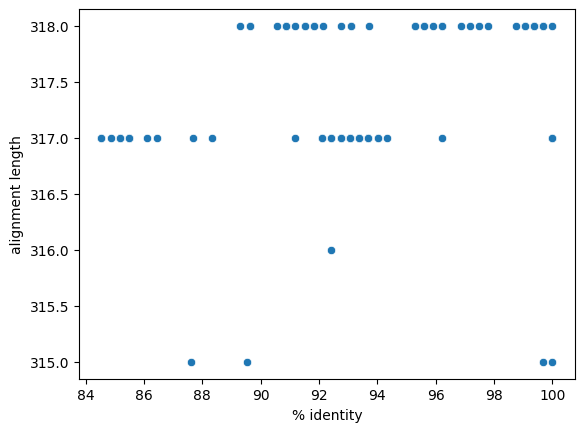

In [48]:
### Your code here . . .
import matplotlib
import seaborn as sns
sns.scatterplot(
    data = blast,
    x= '% identity',
    y = 'alignment length'
)

# allignments with longer lencth seem to have higher percent identity

#### Question 5: ####
Create a plot that shows the correlation between `% identity` and `% positives`.  
Include in your answer and interpretation of what this plot tells you about %identity and %positive.

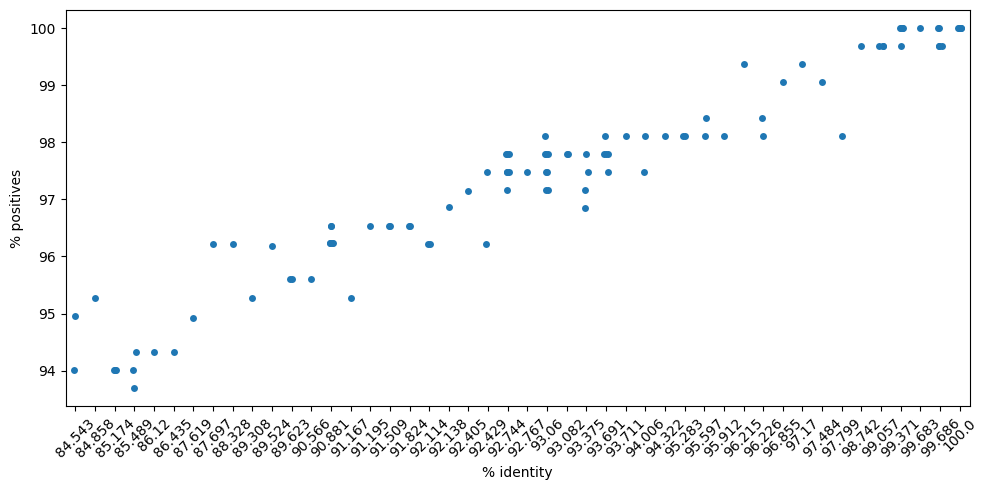

In [80]:
### Your code here . . .


import matplotlib.pyplot as plt

# Create the stripplot
plt.figure(figsize=(10, 5))
ax = sns.stripplot(
    data=blast,
    x="% identity",
    y="% positives"
)

# Rotate x-axis tick labels
plt.xticks(rotation=45)

plt.tight_layout()  # Prevent label cutoff
plt.show()

# this is a strip plot or a dot plot and it shows that % identity and % positives have a postive correlation

#### Question 6: ####
Create a histogram to plot the frequency distribution of `%identity`.

Ask: Are most hits high identity (close to 100%) or spread out?
Include in your answer, are most of the subject acc.ver  `%identity` close to 100% or spread out?

<Axes: xlabel='% identity', ylabel='Count'>

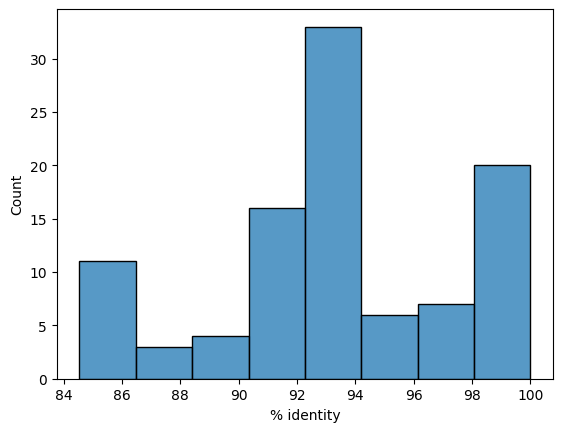

In [81]:
### Your code here . . .
sns.histplot(data=blast, x= '% identity')

#most of them are close to 100, with the lowest being around 84 and the majority being over 90

#### Question 7: ####
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [84]:
protein_info = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv")
blast = blast.reset_index()

merged = pd.merge(
    blast,
    protein_info,
    how="left",
    left_on="subject acc.ver",
    right_on="Protein"
)
merged

,index,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,Unnamed: 0,Protein,Source
0,0,NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,1487.0,9.0,0.0,NP_904328.1,RefSeq
1,1,AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947.0,47.0,NaN,NaN,NaN
2,2,YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,12106.0,13.0,2.0,YP_220563.1,GenPept
3,3,ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,2319.0,41.0,NaN,NaN,NaN
4,4,AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,18964.0,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,ABX45285.1,92.767,318,23,0,1,318,1,318,0,551,97.48,17348.0,6.0,NaN,NaN,NaN
96,96,ASP44815.1,93.375,317,21,0,1,317,1,317,0,551,96.85,7105.0,19.0,NaN,NaN,NaN
97,97,YP_009414156.1,84.543,317,49,0,1,317,1,317,0,551,94.01,18940.0,37.0,97.0,YP_009414156.1,GenPept
98,98,YP_009414363.1,85.174,317,47,0,1,317,1,317,0,551,94.01,18762.0,5.0,98.0,YP_009414363.1,GenPept
